# Zadania z sieciami neuronowymi – ROZWIĄZANIA
W tych zadaniach wykonujemy klasyfikację binarną na zbiorze Census Income ze strony <a href='http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a>.<br>

Celem jest: **określenie, czy dana osoba zarabia więcej niż 50 000 dolarów na podstawie zestawu zmiennych ciągłych i kategorycznych.**

<div class="alert alert-danger" style="margin: 10px"><strong>WAŻNA UWAGA!</strong> Nie uruchamiaj komórek znajdujących się bezpośrednio nad przykładowymi wynikami,<br>w przeciwnym razie nadpiszesz pokazane rozwiązania!</div>


## Zbiór Census Income

W tym zadaniu korzystamy ze zbioru Census Income dostępnego w [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Adult).

Pełny zbiór zawiera **48 842 rekordy**. Na potrzeby ćwiczenia ograniczyliśmy liczbę rekordów, pól i możliwych wartości oraz usunęliśmy wpisy z brakami danych.  

Plik **income.csv** zawiera **30 000 rekordów**.

Każdy wpis opisuje osobę następującymi cechami:

- **age**: wiek w przedziale 18–90 (ciągła)  
- **sex**: `Male` lub `Female` (kategoryczna)  
- **education**: najwyższy osiągnięty poziom edukacji (kategoryczna)  
- **education_num**: edukacja jako liczba całkowita od 3 do 16 (kategoryczna)  

| education_num | education      | education_num | education   | education_num | education    |
|---------------|----------------|---------------|-------------|---------------|--------------|
| 3             | 5th-6th        | 8             | 12th        | 13            | Bachelors    |
| 4             | 7th-8th        | 9             | HS-grad     | 14            | Masters      |
| 5             | 9th            | 10            | Some-college| 15            | Prof-school  |
| 6             | 10th           | 11            | Assoc-voc   | 16            | Doctorate    |
| 7             | 11th           | 12            | Assoc-acdm  |               |              |

- **marital-status**: stan cywilny (kategoryczna)  

| marital-status         |   |   |
|-------------------------|---|---|
| Married                | Divorced              | Married-spouse-absent |
| Separated              | Widowed               | Never-married         |

- **workclass**: ogólne określenie statusu zatrudnienia (kategoryczna)  

| workclass   |   |
|-------------|---|
| Local-gov   | Private |
| State-gov   | Self-emp |
| Federal-gov |          |

- **occupation**: typ wykonywanego zawodu (kategoryczna)  

| occupation       | occupation         | occupation         |
|------------------|--------------------|--------------------|
| Adm-clerical     | Handlers-cleaners  | Protective-serv    |
| Craft-repair     | Machine-op-inspct  | Sales              |
| Exec-managerial  | Other-service      | Tech-support       |
| Farming-fishing  | Prof-specialty     | Transport-moving   |

- **hours-per-week**: liczba godzin pracy w tygodniu (20–90) – zmienna ciągła  
- **income**: czy dochód przekracza \$50 000 rocznie (etykieta)  
- **label**: dochód jako liczba całkowita (`0`: <=\$50K, `1`: >\$50K) – opcjonalna etykieta numeryczna  


## Wykonaj standardowe importy
Uruchom poniższą komórkę, aby wczytać potrzebne biblioteki i sam zbiór Census Income.


In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

df = pd.read_csv('Data/income.csv')

In [3]:
print(len(df))
df.head()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


### Ile jest wartości w poszczególnych klasach (kolumna `label`)?

In [4]:
df['label'].value_counts()

label
0    21700
1     8300
Name: count, dtype: int64

### 1. Wypisz nazwy kolumn ciągłych, kategorycznych i etykiet
Powinieneś znaleźć 5 kolumn kategorycznych, 2 kolumny ciągłe i jedną etykietę.<br>
W przypadku <em>education</em> i <em>education-num</em> nie ma znaczenia, której kolumny użyjesz. Kolumnę etykiety wybierz jednak <em>label</em>, a nie <em>income</em>.<br>
Przypisz zmienne „cat_cols”, „cont_cols” i „y_col” do list nazw kolumn.


In [7]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [ ]:
df.ed

In [5]:
# KOD TUTAJ
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation']
cont_cols = ['age', 'hours-per-week']
y_col = ['label']






# URUCHOM TEN KOD, ABY PORÓWNAĆ WYNIKI:
print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


### 2. Zamień kolumny kategoryczne na typ category
W każdej kolumnie z listy <tt>cat_cols</tt> wywołaj <tt>astype('category')</tt>, dzięki czemu później skorzystasz z <tt>.cat.codes</tt> bez dodatkowego mapowania.

---


In [6]:
# KOD TUTAJ

for cat in cat_cols:
    df[cat] = df[cat].astype('category')





In [8]:
df

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
29995,45,Male,Masters,14,Married,State-gov,Prof-specialty,60,>50K,1
29996,33,Male,HS-grad,9,Married,Private,Machine-op-inspct,40,>50K,1
29997,47,Male,Prof-school,15,Married,Private,Prof-specialty,55,>50K,1
29998,32,Female,Some-college,10,Never-married,Private,Adm-clerical,40,<=50K,0


In [7]:
df.education.dtype

CategoricalDtype(categories=['10th', '11th', '12th', '5th-6th', '7th-8th', '9th',
                  'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate',
                  'HS-grad', 'Masters', 'Prof-school', 'Some-college'],
, ordered=False, categories_dtype=object)

In [12]:
# NIE PISZ TUTAJ
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

### Opcjonalnie: przemieszaj zbiór danych
Plik <strong>income.csv</strong> jest już potasowany. Jeśli jednak po zakończeniu ćwiczeń zechcesz przetestować inne konfiguracje, tutaj możesz przetasować cały zestaw.


In [9]:
# TA KOMÓRKA JEST OPCJONALNA
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


### 3. Ustal rozmiary embeddingów
Utwórz zmienną "cat_szs", która przechowa liczbę kategorii w każdej zmiennej.<br>
Następnie utwórz zmienną "emb_szs" z listą krotek (liczba kategorii, rozmiar embeddingu).<br>
Dobrym punktem wyjścia jest reguła <tt>min(50, (n_cat + 1) // 2)</tt>, która zapobiega tworzeniu zbyt dużych embeddingów.

---


In [14]:
# KOD TUTAJ




In [20]:
# NIE PISZ TUTAJ
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### 4. Utwórz tablicę wartości kategorycznych
Stwórz tablicę NumPy "cats", która zawiera stos każdej kolumny kategorycznej w postaci <tt>.cat.codes.values</tt>.<br>
Uwaga: uzyskane wartości mogą być inne. Nasz wynik pochodzi po wykonaniu kroku tasowania powyżej.<br>
Zachowaj kolejność kolumn identyczną jak w <tt>cat_cols</tt>, aby embeddingi otrzymały właściwe indeksy.

---


In [21]:
# NIE PISZ TUTAJ
sx = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values
ms = df['marital-status'].cat.codes.values
wc = df['workclass'].cat.codes.values
oc = df['occupation'].cat.codes.values

cats = np.stack([sx,ed,ms,wc,oc], 1)

cats[:5]

array([[ 0, 10,  3,  2,  6],
       [ 0, 12,  1,  4,  7],
       [ 1, 13,  0,  2,  0],
       [ 1, 10,  1,  2,  1],
       [ 0, 13,  3,  2,  9]], dtype=int8)

### 5. Zamień „cats” na tensor
Zamień tablicę NumPy „cats” na tensor typu <tt>int64</tt>.


In [22]:
# KOD TUTAJ


In [23]:
# NIE PISZ TUTAJ
cats = torch.tensor(cats, dtype=torch.int64)

### 6. Utwórz tablicę wartości ciągłych
Stwórz tablicę NumPy „conts” ze stosu wszystkich kolumn ciągłych.<br>
Uwaga: uzyskane wartości mogą się różnić. Nasz wynik pochodzi po wykonaniu kroku tasowania powyżej.


In [24]:
# NIE PISZ TUTAJ
conts = np.stack([df[col].values for col in cont_cols], 1)
conts[:5]

array([[23, 50],
       [37, 39],
       [34, 40],
       [31, 40],
       [20, 25]])

### 7. Zamień „conts” na tensor
Zamień tablicę NumPy „conts” na tensor typu <tt>float32</tt>.


In [25]:
# KOD TUTAJ


# URUCHOM TEN KOD, ABY PORÓWNAĆ WYNIKI
conts.dtype

dtype('int64')

In [26]:
# NIE PISZ TUTAJ
conts = torch.tensor(conts, dtype=torch.float)
conts.dtype

torch.float32

### 8. Utwórz tensor etykiet
Stwórz tensor „y” z wartości w kolumnie etykiet. Pamiętaj o spłaszczeniu tensora, aby można go było przekazać do funkcji straty Cross Entropy.


In [27]:
# KOD TUTAJ


In [28]:
# NIE PISZ TUTAJ
y = torch.tensor(df[y_col].values).flatten()

In [29]:
y

tensor([0, 1, 0,  ..., 1, 0, 1])

### 9. Podziel <tt>cats</tt>, <tt>conts</tt> i <tt>y</tt> na zbiory treningowy i testowy
Używamy partii 30 000 rekordów, ale mniejszy batch skróci czas treningu.<br>
My wykorzystaliśmy zbiór testowy o rozmiarze 5 000 rekordów, lecz możesz wybrać inną stałą liczbę lub procent partii.<br>
Upewnij się, że rekordy testowe nie pokrywają się z treningowymi.<br>
Dla wygody przypisz rozmiary partii i testu do prostych zmiennych, np. „b” i „t”.


In [30]:
# NIE PISZ TUTAJ
b = 30000 # sugerowany rozmiar partii
t = 5000  # sugerowany rozmiar testu

cat_train = cats[:b-t]
cat_test  = cats[b-t:b]
con_train = conts[:b-t]
con_test  = conts[b-t:b]
y_train   = y[:b-t]
y_test    = y[b-t:b]

### Zdefiniuj klasę modelu
Uruchom komórkę, aby zdefiniować klasę TabularModel, z której korzystaliśmy wcześniej.


In [31]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Wywołaj __init__ klasy bazowej
        super().__init__()
        
        # Skonfiguruj atrybuty embedding, dropout i batch normalization
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        # Utwórz zmienną przechowującą listę warstw
        layerlist = []
        
        # Przygotuj zmienną na liczbę warstw embedding i ciągłych
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        # Przeiteruj po parametrze "layers" (np. [200,100]), aby zbudować listę warstw
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Zamień listę warstw w atrybut
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        # Pobierz embeddingi z danych kategorycznych
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        # Wykonaj wstępny dropout na embeddingach
        x = self.emb_drop(x)
        
        # Znormalizuj dane ciągłe
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        
        # Skonfiguruj warstwy modelu
        x = self.layers(x)
        return x

### 10. Ustaw ziarno losowe
Aby wyniki można było odtworzyć, ustaw torch.manual_seed (my użyliśmy wartości 33).


In [32]:
# NIE PISZ TUTAJ
torch.manual_seed(33)

### 11. Utwórz instancję TabularModel
Utwórz instancję „model” z jedną warstwą ukrytą o 50 neuronach i dropoutem z p = 0.4.


In [33]:
# NIE PISZ TUTAJ
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### 12. Zdefiniuj funkcję straty i optymalizator
Utwórz funkcję straty „criterion” z użyciem CrossEntropyLoss.<br>
Stwórz optymalizator „optimizer” oparty na Adamie z krokiem uczenia 0.001.


In [34]:
# NIE PISZ TUTAJ
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Wytrenuj model
Uruchom komórkę, aby wytrenować model przez 300 epok. Rezultaty mogą się różnić!<br>
Po ukończeniu ćwiczeń zachęcamy do eksperymentowania z innymi parametrami.


In [35]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # wypisz ostatnią linię
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # wypisz czas trwania

epoch:   1  loss: 0.81344748
epoch:  26  loss: 0.59463954
epoch:  51  loss: 0.51533061
epoch:  76  loss: 0.46403289
epoch: 101  loss: 0.42922851
epoch: 126  loss: 0.40061614
epoch: 151  loss: 0.37124929
epoch: 176  loss: 0.35843724
epoch: 201  loss: 0.34800193
epoch: 226  loss: 0.33588177
epoch: 251  loss: 0.33126265
epoch: 276  loss: 0.32284048
epoch: 300  loss: 0.31732303

Duration: 6 seconds


### 13. Wykreśl stratę krzyżowej entropii względem epok
Rezultaty mogą się różnić. Liczy się kształt wykresu.


In [36]:
# KOD TUTAJ




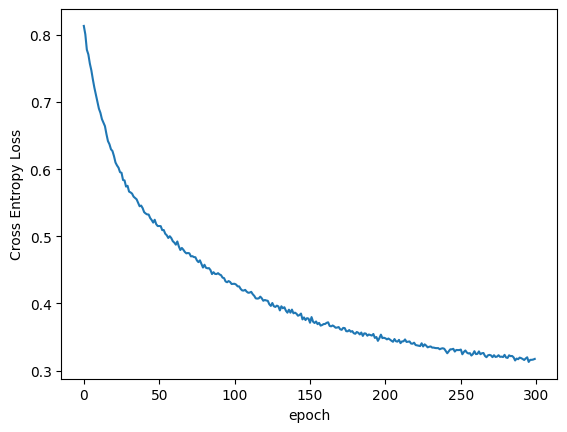

In [36]:
# NIE PISZ TUTAJ
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

### 14. Oceń zbiór testowy
Przy ustawionym <tt>torch.no_grad()</tt> przekaż <tt>cat_test</tt> i <tt>con_test</tt> przez wytrenowany model. Utwórz zbiór walidacyjny „y_val”. Porównaj wyniki z <tt>y_test</tt> przy użyciu zdefiniowanej wcześniej funkcji straty. Wyniki mogą się różnić.


In [41]:
# KOD TUTAJ




# URUCHOM TEN KOD, ABY PORÓWNAĆ WYNIKI
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.31732303


In [37]:
# ABY OCENIĆ ZBIÓR TESTOWY
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.33357421


### 15. Oblicz ogólną dokładność procentową
Za pomocą pętli porównaj wartości argmax z walidacyjnego <tt>y_val</tt> z odpowiadającymi elementami <tt>y_test</tt>.<br>
Alternatywnie możesz obliczyć wynik wektorowo: <tt>preds.argmax(dim=1).eq(y_val).float().mean().item()</tt>.

---


In [43]:
# KOD TUTAJ







In [38]:
# NIE PISZ TUTAJ
rows = len(y_test)
correct = 0

# print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')

for i in range(rows):
    # print(f'{str(y_val[i]):26} {y_val[i].argmax().item():^7}{y_test[i]:^7}')

    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


4230 out of 5000 = 84.60% correct


### BONUS: Przepuść nowe dane przez wytrenowany model
Spróbuj napisać funkcję, która pozwoli użytkownikowi wprowadzić własne wartości i wygeneruje predykcję.<br>
<strong>PODPOWIEDŹ</strong>:<br>Nie musisz tworzyć DataFrame. Możesz pobrać dane wejściowe, zmapować je na kody za pomocą słownika i bezpośrednio utworzyć tensory:<br>
<pre>mar = input("What is the person's marital status? ")
mar_d = dict(Divorced=0, Married=1, Married-spouse-absent=2, Never-married=3, Separated=4, Widowed=5)
mar = mar_d[mar]
cats = torch.tensor([..., ..., mar, ..., ...], dtype=torch.int64).reshape(1,-1)</pre>
Upewnij się, że nazwy są posortowane alfabetycznie przed przypisaniem numerów.

Pamiętaj także, by przed podaniem nowych danych wywołać <tt>model.eval()</tt>. Powodzenia!


In [45]:
# NAPISZ TU SWÓJ KOD:


In [46]:
# URUCHOM SWÓJ KOD TUTAJ:


In [41]:
# NIE PISZ TUTAJ
def test_data(mdl, age, sex, edn, mar, wrk, occ, hrs): # pass in the name of the model
    # INPUT NEW DATA
    # age = float(input("What is the person's age? (18-90)  "))
    # sex = input("What is the person's sex? (Male/Female) ").capitalize()
    # edn = int(input("What is the person's education level? (3-16) "))
    # mar = input("What is the person's marital status? ").capitalize()
    # wrk = input("What is the person's workclass? ").capitalize()
    # occ = input("What is the person's occupation? ").capitalize()
    # hrs = float(input("How many hours/week are worked? (20-90)  "))

    # PREPROCESS THE DATA
    sex_d = {'Female':0, 'Male':1}
    mar_d = {'Divorced':0, 'Married':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
    wrk_d = {'Federal-gov':0, 'Local-gov':1, 'Private':2, 'Self-emp':3, 'State-gov':4}
    occ_d = {'Adm-clerical':0, 'Craft-repair':1, 'Exec-managerial':2, 'Farming-fishing':3, 'Handlers-cleaners':4,
            'Machine-op-inspct':5, 'Other-service':6, 'Prof-specialty':7, 'Protective-serv':8, 'Sales':9, 
            'Tech-support':10, 'Transport-moving':11}

    sex = sex_d[sex]
    mar = mar_d[mar]
    wrk = wrk_d[wrk]
    occ = occ_d[occ]

    edn = edn-3
    
    # CREATE CAT AND CONT TENSORS
    cats = torch.tensor([sex,edn,mar,wrk,occ], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hrs], dtype=torch.float).reshape(1,-1)
    
    # SET MODEL TO EVAL (in case this hasn't been done)
    mdl.eval()

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(cats, conts).argmax().item()

    print(f'\nThe predicted label is {z}')

data = {
    "age": 20,
    "sex": "Female",
    "edn": 15,
    "mar": "Divorced", 
    "wrk": "Self-emp",
    "occ": "Tech-support",
    "hrs": 10
}

test_data(model, **data)


The predicted label is 0


## Świetna robota!
